In [2]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# File paths
processed_file = "processed_fake_news.csv"

In [3]:
# Initialize global frequency distributions
global_freq_tokens = FreqDist()
global_freq_stemmed = FreqDist()

# Process `content` (which contains the tokenized content) and `stemmed_tokens` in chunks
# Collect words after tokenizing and before and after stopword removal and stemming
for chunk in pd.read_csv(processed_file, usecols=['content', 'stemmed_tokens'], chunksize=10000):
    
    # Here we also remove punctuation as they otherwise would dominate and clutter the "most frequent words" list
    all_tokens = [word for doc in chunk["content"] for word in eval(doc) if word.isalnum() or word.startswith("_")]
    stemmed_tokens = [word for doc in chunk["stemmed_tokens"] for word in eval(doc) if word.isalnum() or word.startswith("_")]

    # Update frequency distributions
    global_freq_tokens.update(all_tokens)
    global_freq_stemmed.update(stemmed_tokens)

In [4]:
# Print insights
print("The number of URLs in the (cleaned) content is:", global_freq_stemmed['_url_'])
print("The number of dates in the (cleaned) content is:", global_freq_stemmed['_date_'])
print("The number of numeric values in the (cleaned) content is:", global_freq_stemmed['_num_'])

print("Vocabulary size after cleaning (without punctuation):", global_freq_tokens.B())
print("Vocabulary size after stemming and stopword removal (without punctuation):", global_freq_stemmed.B())

reduction_rate = (global_freq_tokens.B() - global_freq_stemmed.B()) / global_freq_tokens.B() * 100
print(f"Reduction rate after stemming and stopword removal: {reduction_rate:.2f}%")

print("100 most frequent words (before stopword removal and stemming): \n", global_freq_tokens.most_common(100))
print("100 most frequent words (after stopword removal and stemming): \n", global_freq_stemmed.most_common(100))

The number of URLs in the (cleaned) content is: 365337
The number of dates in the (cleaned) content is: 746272
The number of numeric values in the (cleaned) content is: 5228702
Vocabulary size after cleaning (without punctuation): 1155182
Vocabulary size after stemming and stopword removal (without punctuation): 1007203
Reduction rate after stemming and stopword removal: 12.81%
100 most frequent words (before stopword removal and stemming): 
 [('the', 21990018), ('to', 10297881), ('of', 10100974), ('and', 9517184), ('a', 8373087), ('in', 7256408), ('_NUM_', 5158047), ('that', 4806384), ('is', 4151598), ('for', 3638203), ('it', 3100384), ('on', 2933451), ('with', 2389735), ('s', 2335295), ('as', 2298313), ('was', 2167610), ('i', 2122310), ('are', 1965737), ('by', 1955986), ('this', 1920003), ('he', 1917320), ('be', 1835623), ('you', 1811772), ('at', 1797524), ('not', 1764059), ('have', 1752830), ('from', 1654939), ('has', 1477909), ('they', 1476764), ('but', 1460708), ('an', 1424225), (

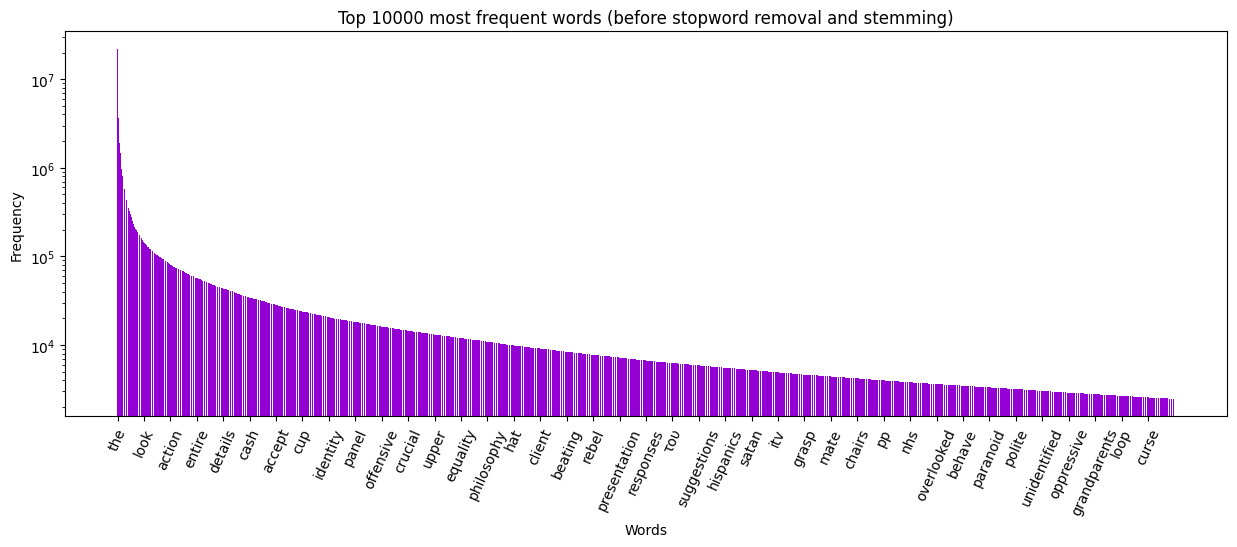

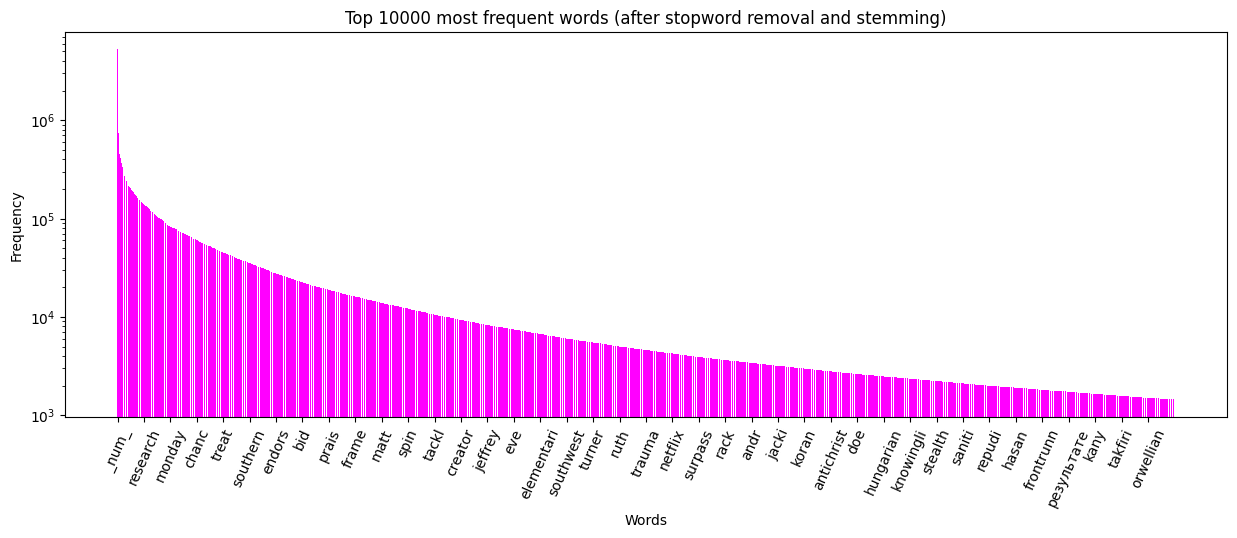

In [5]:
# Function to plot word frequency distribution (barplot)
def plot_word_freq(sorted_word_freq, title, color):
    words, freq = zip(*sorted_word_freq)                                    # split the given list into two tuples
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(freq)), freq, color=color)
    plt.xticks(range(0, len(words), 250), words[::250], rotation=66)        # rotating the x-axis labels for readbility and set to show every 500th word only
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.title(title)
    plt.show()

# Plotting the frequency distribution of the top 10000 words before and after stopword removal and stemming
plot_word_freq(global_freq_tokens.most_common(10000), 'Top 10000 most frequent words (before stopword removal and stemming)', 'darkviolet')
plot_word_freq(global_freq_stemmed.most_common(10000), 'Top 10000 most frequent words (after stopword removal and stemming)', 'magenta')